In [1]:
from data_analysis import *
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# SDP

In [2]:
def plot_multiple_dfs(dfs, labels, venus=False, dataset=None, Cut=False, time_limit=200, x_start=0):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Define a color map for different dataframes
    colors = plt.cm.get_cmap('tab10', len(dfs))
    
    # Check if any dataframe has 'Cut Generation' with non-zero values
    if Cut:
        has_cut_generation = any('Cut Generation' in df.columns and df['Cut Generation'].sum() > 0 for df in dfs)
    else:
        has_cut_generation = False
    ax2 = None
    for i, (df, label) in enumerate(zip(dfs, labels)):
        # Filter out rows where Status is 'safe'
        if venus:
            df_filtered = df.loc[(df['Status'] == 'safe-incomplete') | (df['Status'] == 'safe') | (df['Status'] == 'safe-mip') | (df['Status'] == 'safe-mip (timed out)')]
        else:
            x_start = df.loc[(df['Status'] == 'safe-incomplete')].shape[0]
            df_filtered = df.loc[(df['Status'] == 'safe') | (df['Status'] == 'safe-mip') | (df['Status'] == 'safe-mip (timed out)')]
        
        # Sort the dataframe by Time
        df_filtered = df_filtered.sort_values(by='Time')
        
        # Compute the cumulative count of verified instances
        df_filtered['Cumulative Count'] = range(x_start, x_start + len(df_filtered))
        
        # Plot Cumulative Count vs. Time
        ax1.plot(df_filtered['Cumulative Count'], df_filtered['Time'], marker='o', linestyle='-', color=colors(i), label=label)
        
        # If 'Cut Generation' exists and has non-zero values, plot it as well
        if Cut:
            if has_cut_generation and 'Cut Generation' in df.columns and df['Cut Generation'].sum() > 0:
                if ax2 is None:
                    ax2 = ax1.twinx()  # Create a second y-axis if needed
                ax2.bar(df_filtered['Cumulative Count'], df_filtered['Cut Generation'], color=colors(i), alpha=0.3, label=f'{label} Cut Generation')
                ax2.set_ylabel('Cut Generation', fontsize=20)

    ax1.set_xlabel(f'Number of Instances Verified in {dataset}', fontsize=20)
    ax1.set_ylabel('Time', fontsize=20)
    ax1.set_title('Number of Instances Verified vs. Time', fontsize=20)
    ax1.grid(True)

    # Set the y-axis limit
    max_time = max(df_filtered['Time'].max(), time_limit)
    ax1.set_ylim(0, max_time + 5)
    
    # Add a horizontal line at y=200 to emphasize the time limitation
    if max_time + 5 > time_limit:
        ax1.axhline(y=time_limit, color='red', linestyle='--', linewidth=2, label='Time Limit (200)')
    
    # Combine legends from both y-axes if 'Cut Generation' was plotted
    lines, labels = ax1.get_legend_handles_labels()
    if has_cut_generation:
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines + lines2, labels + labels2, fontsize=20)
    else:
        ax1.legend(lines, labels, fontsize=20)
    
    plt.show()


## cifar_cnn_a_mix

/tmp/ipykernel_1193169/406527908.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(dfs))


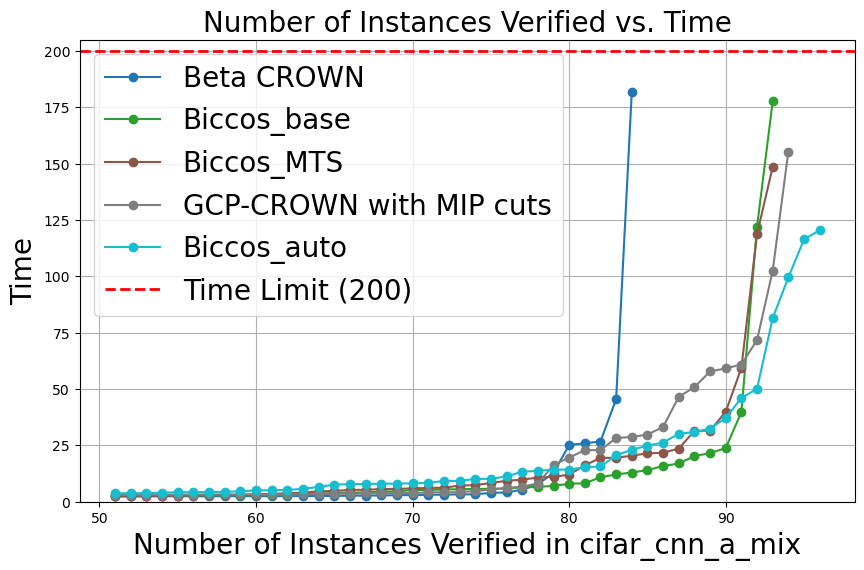

In [3]:
plot_multiple_dfs(
    [
        log_read('cifar_cnn_a_mix/beta.log'),
        log_read('cifar_cnn_a_mix/biccos_only_cs.log'),
        log_read('cifar_cnn_a_mix/biccos_all.log'),
        log_read('cifar_cnn_a_mix/gcp.log'),
        log_read('cifar_cnn_a_mix/biccos_all_selective_mts_plus_gcp.log'),
    ],
    [
        'Beta CROWN',
        'Biccos_base',
        'Biccos_MTS',
        'GCP-CROWN with MIP cuts',
        'Biccos_auto',
    ], dataset= 'cifar_cnn_a_mix'
)

In [4]:
main('cifar_cnn_a_mix/beta.log'),



    Status      Time  Domain Visited  Cut Generation  Unsat Nodes  \
0     safe    7.6827               0               0            0   
7     safe    3.2981             242               0            0   
13    safe    2.4107               0               0            0   
18    safe    3.0849              58               0            0   
19    safe    3.1483              17               0            0   
24    safe    2.7228              14               0            0   
39    safe    2.3795               0               0            0   
40    safe   26.7175           70210               0            0   
42    safe    2.4599               0               0            0   
52    safe   45.5751          129259               0            0   
55    safe    2.5576               0               0            0   
59    safe    4.1377             110               0            0   
64    safe    2.4336               0               0            0   
70    safe    2.4263              

((85.0, 4.783835294117647, 24965.58823529412, 0.0),)

In [5]:
main('cifar_cnn_a_mix/biccos_only_cs.log'),


    Status      Time  Domain Visited  Cut Generation  Unsat Nodes  \
0     safe    7.9489              50               7          656   
7     safe    5.5304             312              86         1274   
13    safe    2.8803              50              12          656   
18    safe    7.0659             292             112         1431   
19    safe    3.8333              17              81         1467   
24    safe    5.6900             154              25          908   
35    safe    5.8944             460              85         1089   
39    safe    2.6678               0               1          256   
40    safe   39.7776           45652            1390        23774   
42    safe    4.1099              50              26         1273   
52    safe   12.9303            9428              63         6351   
54    safe    8.1901            5340             106         4301   
55    safe    5.4311             210              23         1310   
59    safe    4.5790              

((94.0, 6.688868085106383, 11832.116279069767, 118.06976744186046),)

In [6]:
main('cifar_cnn_a_mix/biccos_all.log'),


    Status      Time  Domain Visited  Cut Generation  Unsat Nodes  \
0     safe    8.2780              50               7          400   
7     safe    5.6229             312             149         1194   
13    safe    2.7282              50              12          400   
18    safe    5.9420             262              76         1432   
19    safe    9.7856             380             189         2190   
24    safe    5.2642             153              44          791   
35    safe    4.7737             363              98         1190   
39    safe    2.5019               0               1           12   
40    safe   39.9138           49456             639        26299   
42    safe    4.0133              50              26          761   
52    safe   19.5028           12958             148         7564   
54    safe   59.3908           70733             155        36103   
55    safe    5.2964             210              23         1310   
59    safe   10.7356             5

((94.0, 7.876484042553192, 12238.093023255815, 121.25581395348837),)

In [7]:
main('cifar_cnn_a_mix/gcp.log'),


    Status      Time  Domain Visited  Cut Generation  Unsat Nodes  \
0     safe    6.7414               0               0            0   
7     safe    4.6933             243               0            0   
13    safe    3.2868               0               0            0   
18    safe    3.8658              56               0            0   
19    safe    4.1628              25               0            0   
24    safe    3.6817              14               0            0   
35    safe   22.8746           29950               0            0   
39    safe    3.0942               0               0            0   
40    safe   28.2507           60103               0            0   
42    safe    3.5453               0               0            0   
52    safe   19.5755           28801               0            0   
54    safe   59.1633          133120               0            0   
55    safe    3.2386               0               0            0   
59    safe    5.4743             1

((95.0, 9.70374105263158, 27779.75, 0.0),)

In [8]:
main('cifar_cnn_a_mix/biccos_all_selective_mts_plus_gcp.log'),

    Status      Time  Domain Visited  Cut Generation  Unsat Nodes  \
0     safe   10.1557              50               7          400   
7     safe    7.8430             287             105         1522   
13    safe    4.6425              50              12          400   
18    safe    8.4210             262              76         1431   
19    safe   14.2433             380             195         2191   
24    safe    7.8128             153              49          791   
35    safe    7.5847             417              95         1370   
39    safe    3.8044               0               1           12   
40    safe   30.1405           23877            1183        11098   
42    safe    5.6822              50              26          761   
52    safe   20.6108            6106             709         4055   
54    safe   50.0834           52102             634        35370   
55    safe    8.0511             210              23         1310   
59    safe   13.7170             5

      Status      Time  Domain Visited  Cut Generation  Unsat Nodes  \
2    unknown  201.0940          209146           11380        60716   
11   unknown  211.5303          212642            7051        51260   
26   unknown  207.5173          202199            6884       128078   
60   unknown  217.4360          250305            8337        47627   
103  unknown  228.3675          262925            1692        47596   
106  unknown  213.5078          205391            7130        60975   
116  unknown  204.7083          150067            7682        50985   
152  unknown  203.1607          219724            2057        86669   
187  unknown  206.1123          121721           20804       112314   

     BaB Round Count  BaB_lb_rhs  
2                 53   -0.517040  
11                24   -0.092060  
26                70   -0.160278  
60                25   -0.326387  
103               27   -0.335337  
106               40   -0.387486  
116               29   -0.321611  
152      

((97.0, 10.318551546391753, 10992.282608695652, 597.5652173913044),)

## cifar_cnn_a_mix4

/tmp/ipykernel_1193169/406527908.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(dfs))


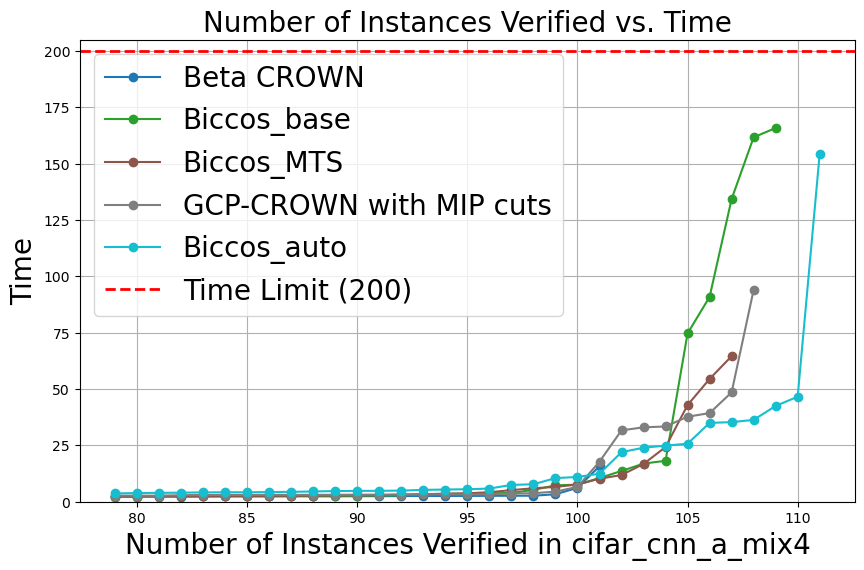

In [9]:
plot_multiple_dfs(
    [
        log_read('cifar_cnn_a_mix4/beta.log'),
        log_read('cifar_cnn_a_mix4/biccos_only_cs.log'),
        log_read('cifar_cnn_a_mix4/biccos_all.log'),
        log_read('cifar_cnn_a_mix4/gcp.log'),
        log_read('cifar_cnn_a_mix4/biccos_all_selective_mts_plus_gcp.log'),
    ],
    [
        'Beta CROWN', 
        'Biccos_base', 
        'Biccos_MTS', 
        'GCP-CROWN with MIP cuts',  
        'Biccos_auto'
     ],  time_limit=200, dataset='cifar_cnn_a_mix4'
)

In [10]:
main('cifar_cnn_a_mix4/beta.log'),


    Status     Time  Domain Visited  Cut Generation  Unsat Nodes  \
2     safe   6.1621              97               0            0   
19    safe   2.3232               0               0            0   
24    safe   2.4539               2               0            0   
38    safe   2.2779               0               0            0   
48    safe   2.2640               0               0            0   
54    safe   2.2185               0               0            0   
64    safe   2.6691               0               0            0   
67    safe   2.5685               1               0            0   
83    safe  15.7565           35820               0            0   
93    safe   2.3868               0               0            0   
97    safe   2.3938               0               0            0   
104   safe   2.3561               0               0            0   
111   safe   2.3654               0               0            0   
120   safe   2.3545               0             

((102.0, 0.7951656862745098, 1565.9130434782608, 0.0),)

In [11]:
main('cifar_cnn_a_mix4/biccos_only_cs.log'),


    Status      Time  Domain Visited  Cut Generation  Unsat Nodes  \
2     safe   10.5337             249              84         1015   
19    safe    2.3505               0               1          256   
24    safe    3.8858             113              37          606   
38    safe    2.3736               0               1          256   
48    safe    2.5964              50               6          524   
54    safe    2.3120               0               1          256   
57    safe   16.9183           13354             288        11055   
59    safe  165.8314          190849             141       124035   
64    safe    2.6179              50               7          656   
66    safe   90.8676          110850            1177        71311   
67    safe    2.8365             100              56          656   
83    safe   18.1696           18316            1075        16290   
93    safe    2.4471              50              10          656   
97    safe    2.4840              

((110.0, 6.966400000000001, 26608.612903225807, 154.25806451612902),)

In [12]:
main('cifar_cnn_a_mix4/biccos_all.log'),


    Status     Time  Domain Visited  Cut Generation  Unsat Nodes  \
2     safe  10.2084             226              76          951   
19    safe   2.4446               0               1            8   
24    safe   4.2141             112              26          606   
38    safe   2.4614               0               1           19   
48    safe   2.7974              50               6          268   
54    safe   2.4164               0               1           24   
57    safe  16.7475            4965             313         6440   
64    safe   2.6762              50               7          400   
66    safe  54.4841           64742            1246        36519   
67    safe   2.8310             100              56          400   
83    safe  24.2685           26043            1259        14443   
93    safe   2.5548              50              10          400   
97    safe   2.5903              50               9          400   
104   safe   2.5710              50             

((108.0, 2.8750018518518514, 8253.620689655172, 143.6206896551724),)

In [13]:
main('cifar_cnn_a_mix4/gcp.log'),


    Status     Time  Domain Visited  Cut Generation  Unsat Nodes  \
2     safe   6.5550              97               0            0   
13    safe  93.9814          131524               0            0   
19    safe   3.0347               0               0            0   
24    safe   3.0133               2               0            0   
38    safe   2.7080               0               0            0   
48    safe   2.6879               0               0            0   
54    safe   2.6915               0               0            0   
57    safe  33.3893           54878               0            0   
64    safe   3.1121               0               0            0   
66    safe  48.5184           67530               0            0   
67    safe   3.0716               1               0            0   
77    safe  39.3251           68979               0            0   
83    safe  17.7683           32159               0            0   
93    safe   3.0177               0             

((109.0, 3.8203853211009173, 18271.2, 0.0),)

In [14]:
main('cifar_cnn_a_mix4/biccos_all_selective_mts_plus_gcp.log'),

    Status      Time  Domain Visited  Cut Generation  Unsat Nodes  \
2     safe   12.4112             226              64          953   
13    safe  154.3116          123686            8975       108892   
19    safe    4.1852               0               1            8   
24    safe    5.4166             112              26          606   
38    safe    3.6757               0               1           19   
48    safe    4.0118              50               6          268   
54    safe    3.9413               0               1           24   
57    safe   24.8925            4848            1421         6001   
64    safe    4.8336              50               7          400   
66    safe   46.5845           38334            2461        24946   
67    safe    4.8060             100              56          400   
77    safe   25.7418           15784            1657        12494   
83    safe   23.9677           20100             603         8498   
93    safe    4.1935              

((112.0, 5.237609821428571, 10059.787878787878, 752.3333333333334),)

## cifar_cnn_a_adv

/tmp/ipykernel_1193169/406527908.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(dfs))


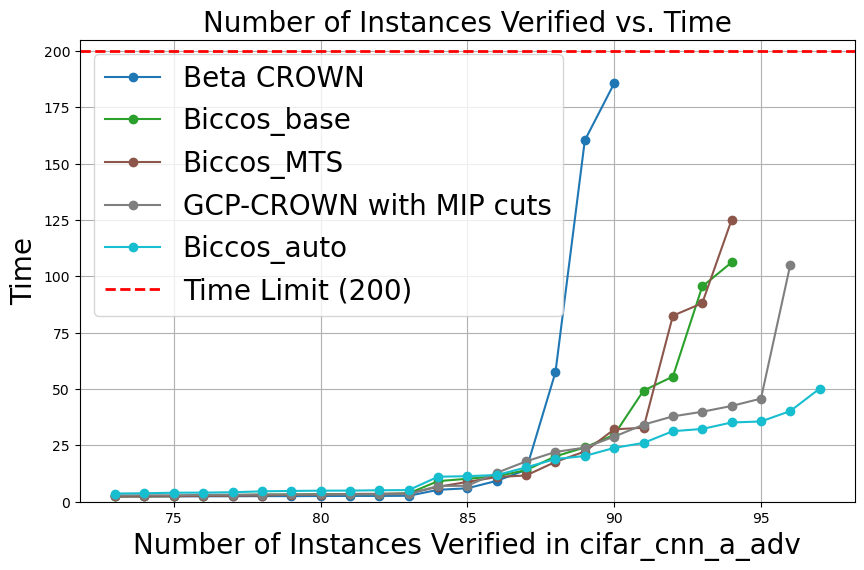

In [15]:
plot_multiple_dfs(
    [
        log_read('cifar_cnn_a_adv/beta.log'),
log_read('cifar_cnn_a_adv/biccos_only_cs.log'),
log_read('cifar_cnn_a_adv/biccos_all.log'),
log_read('cifar_cnn_a_adv/gcp.log'),
log_read('cifar_cnn_a_adv/biccos_all_selective_mts_plus_gcp.log'),
    ],
    [
        'Beta CROWN',
        'Biccos_base',
        'Biccos_MTS',
        'GCP-CROWN with MIP cuts',
        'Biccos_auto'
    ],
     time_limit=200, dataset='cifar_cnn_a_adv'
)

In [16]:
main('cifar_cnn_a_adv/beta.log'),



    Status      Time  Domain Visited  Cut Generation  Unsat Nodes  \
11    safe    5.9707             176               0            0   
38    safe    2.3691               0               0            0   
42    safe    9.2644           16543               0            0   
54    safe    2.3530               0               0            0   
60    safe    2.3584               0               0            0   
84    safe    2.4069               0               0            0   
89    safe   14.1241           23800               0            0   
95    safe    2.5740               3               0            0   
103   safe   57.4964          162394               0            0   
107   safe    2.4310               0               0            0   
112   safe    2.4804               0               0            0   
132   safe    2.4847               0               0            0   
139   safe    5.2863            1304               0            0   
158   safe    2.5721              

((91.0, 5.170186813186813, 63809.77777777778, 0.0),)

In [17]:
main('cifar_cnn_a_adv/gcp.log'),


    Status      Time  Domain Visited  Cut Generation  Unsat Nodes  \
11    safe    7.0081             176               0            0   
24    safe   39.9197           72132               0            0   
38    safe    2.7917               0               0            0   
42    safe   12.8234           16538               0            0   
54    safe    2.8457               0               0            0   
60    safe    3.1072               0               0            0   
70    safe  105.2261          140260               0            0   
84    safe    3.2103               0               0            0   
89    safe   17.9034           23622               0            0   
95    safe    3.1835               3               0            0   
97    safe   22.0904           37229               0            0   
103   safe   24.0098           40387               0            0   
107   safe    3.0266               0               0            0   
112   safe    3.3098              

((97.0, 4.784790721649484, 28558.708333333332, 0.0),)

In [18]:
main('cifar_cnn_a_adv/biccos_only_cs.log'),


    Status      Time  Domain Visited  Cut Generation  Unsat Nodes  \
11    safe   11.2892             195              42         1150   
38    safe    2.9092              50               9          615   
42    safe   14.0340            7460             344         6618   
54    safe    2.6891               0               1          256   
60    safe    2.4644               0               1          256   
70    safe   10.1848            6226             127         5947   
84    safe    3.1698              50               7          656   
89    safe   20.1447           12847             164         8268   
95    safe    3.3952             100              21          655   
103   safe   29.6858           25335             222        14200   
107   safe    2.3677               0               1          256   
112   safe    3.3759             100              67          656   
116   safe  106.2064          125407             689        55196   
132   safe    2.5006              

((95.0, 4.8833673684210535, 18613.68181818182, 169.0),)

In [19]:
main('cifar_cnn_a_adv/biccos_all.log'),


    Status      Time  Domain Visited  Cut Generation  Unsat Nodes  \
11    safe   10.9533             169              15         1284   
38    safe    2.7397              50               9          359   
42    safe   11.6498            7457             167         6398   
54    safe    2.3588               0               1           26   
60    safe    2.3459               0               1           12   
70    safe    6.6255            3074              84         3100   
84    safe    2.6087              50               7          400   
89    safe   17.6888           12958             182         8763   
95    safe    3.0826             100              21          655   
103   safe   22.2698           21832             124        12074   
107   safe    2.5762               0               1           11   
112   safe    3.0860             100              67          656   
116   safe  125.0573          149219            1011        79431   
132   safe    2.4621              

((95.0, 5.008787368421053, 20134.272727272728, 159.54545454545453),)

In [20]:
main('cifar_cnn_a_adv/biccos_all_selective_mts_plus_gcp.log'),

    Status     Time  Domain Visited  Cut Generation  Unsat Nodes  \
11    safe  11.0908             169              15         1284   
24    safe  32.2906           23977            2191        21103   
38    safe   4.2012              50               9          359   
42    safe  15.2334            7461             553         6408   
54    safe   3.7584               0               1           26   
60    safe   4.6124               0               1           12   
70    safe  11.8538            5784             102         5641   
84    safe   4.0450              50               7          400   
89    safe  18.9451           11589             441         7573   
95    safe   4.9327             100              21          655   
97    safe  26.0965           19222            1313        18899   
103   safe  20.3046           12511             464         6600   
107   safe   3.6288               0               1           11   
112   safe   5.0810             100             

((98.0, 4.262720408163266, 9902.96, 506.88),)

## cifar_cnn_a_adv4

/tmp/ipykernel_1193169/406527908.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(dfs))


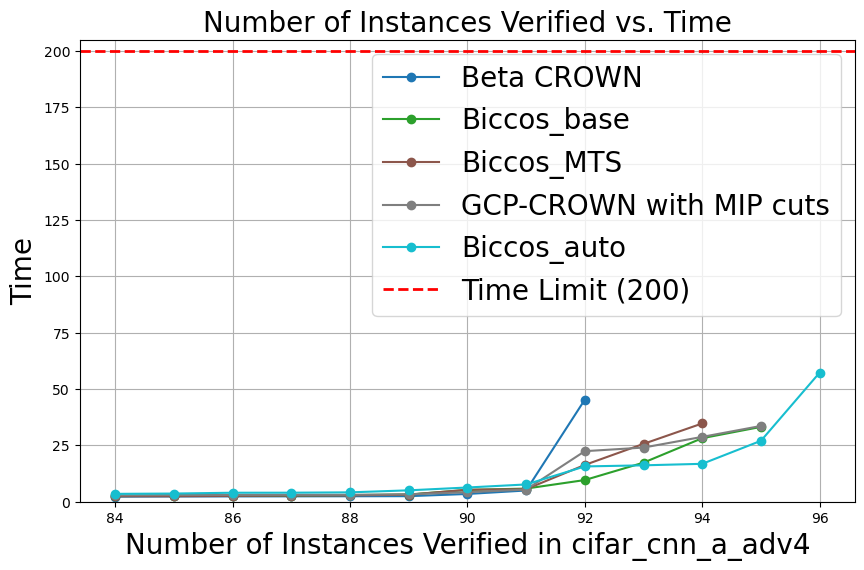

In [21]:
plot_multiple_dfs(
    [
log_read('cifar_cnn_a_adv4/beta.log'),
log_read('cifar_cnn_a_adv4/biccos_only_cs.log'),
log_read('cifar_cnn_a_adv4/biccos_all.log'),
log_read('cifar_cnn_a_adv4/gcp.log'),
log_read('cifar_cnn_a_adv4/biccos_all_selective_mts_plus_gcp.log'),
    ],
    [
        'Beta CROWN',
        'Biccos_base',
        'Biccos_MTS',
        'GCP-CROWN with MIP cuts',
        'Biccos_auto'
        #'x_cut'
    ],  time_limit=200, dataset='cifar_cnn_a_adv4',
)

In [22]:
main('cifar_cnn_a_adv4/beta.log'),



    Status     Time  Domain Visited  Cut Generation  Unsat Nodes  \
24    safe   4.9809               0               0            0   
57    safe   2.2450               0               0            0   
123   safe  45.2908          133583               0            0   
128   safe   3.4424             282               0            0   
137   safe   2.3288               0               0            0   
159   safe   2.3541               0               0            0   
169   safe   2.4279               0               0            0   
183   safe   2.4642               0               0            0   
188   safe   2.3883               0               0            0   

     BaB Round Count  BaB_lb_rhs  
24                 1         NaN  
57                 1         NaN  
123               36         NaN  
128                5         NaN  
137                1         NaN  
159                1         NaN  
169                1         NaN  
183                1         NaN  
188 

((93.0, 0.7805602150537635, 14873.888888888889, 0.0),)

In [23]:
main('cifar_cnn_a_adv4/biccos_only_cs.log'),



    Status     Time  Domain Visited  Cut Generation  Unsat Nodes  \
24    safe   5.8359               0               1          256   
52    safe  28.1921           29268             308        19720   
57    safe   2.6432               0               1          256   
64    safe   9.6194            6195             123         3222   
123   safe  17.3450           16230             274        10624   
128   safe   5.2362             346              83         1078   
137   safe   2.6983              50               4          656   
159   safe   2.5030               0               1          256   
169   safe   3.1983             100              49          638   
181   safe  33.2071           41737             720        17347   
183   safe   2.9258              50               4          256   
188   safe   2.7057              50               5          656   

     BaB Round Count  BaB_lb_rhs  
24                 2         NaN  
52                19         NaN  
57        

((96.0, 1.2713489583333333, 7835.5, 131.08333333333334),)

In [24]:
main('cifar_cnn_a_adv4/biccos_all.log'),

    Status     Time  Domain Visited  Cut Generation  Unsat Nodes  \
24    safe   5.3146               0               1            3   
52    safe  25.6757           25713             314        16290   
57    safe   2.4374               0               1           41   
123   safe  16.3231           14574             373         9087   
128   safe   5.5706             327              64         1062   
137   safe   2.5783              50               3          400   
159   safe   2.4294               0               1           18   
169   safe   3.1060             100              52          378   
181   safe  34.7330           41316             635        17189   
183   safe   2.8005              50               4          139   
188   safe   2.7262              50               5          400   

     BaB Round Count  BaB_lb_rhs  
24                 1         NaN  
52                20         NaN  
57                 1         NaN  
123               18         NaN  
128     

((95.0, 1.1535894736842105, 7470.909090909091, 132.0909090909091),)

In [25]:
main('cifar_cnn_a_adv4/gcp.log'),


    Status     Time  Domain Visited  Cut Generation  Unsat Nodes  \
24    safe   5.3958               0               0            0   
52    safe  28.7735           58752               0            0   
57    safe   2.8141               0               0            0   
64    safe  33.6220           51340               0            0   
123   safe  24.0327           35261               0            0   
128   safe   4.2128             282               0            0   
137   safe   3.0059               0               0            0   
159   safe   2.9590               0               0            0   
169   safe   3.2859               0               0            0   
178   safe  22.4324           38128               0            0   
183   safe   3.0707               0               0            0   
188   safe   3.0309               0               0            0   

     BaB Round Count  BaB_lb_rhs  
24                 1         NaN  
52                16         NaN  
57        

((96.0, 1.4787343750000002, 15313.583333333334, 0.0),)

In [26]:
main('cifar_cnn_a_adv4/biccos_all_selective_mts_plus_gcp.log'),

    Status     Time  Domain Visited  Cut Generation  Unsat Nodes  \
24    safe   6.3103               0               1            3   
52    safe  15.6585            7025             726         5744   
57    safe   3.4880               0               1           41   
64    safe  27.0393           17031            1918        16330   
123   safe  16.1507            9113             564         6028   
128   safe   7.6613             330              79         1054   
137   safe   4.0018              50               3          400   
159   safe   3.6262               0               1           19   
169   safe   5.0540             100              42          373   
178   safe  16.8198            8895            1398         9077   
181   safe  57.3040           44854            4241        22585   
183   safe   3.9891              50               4          139   
188   safe   4.1597              50               5          400   

     BaB Round Count  BaB_lb_rhs  
24          

((97.0, 1.817163917525773, 6730.615384615385, 691.0),)

## cifar_cnn_b_adv

python abcrown.py --config exp_configs/GCP-CROWN/cifar_cnn_b_adv.yaml &> /home/duo/log/cifar_cnn_b_adv_.log

/tmp/ipykernel_1193169/406527908.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(dfs))


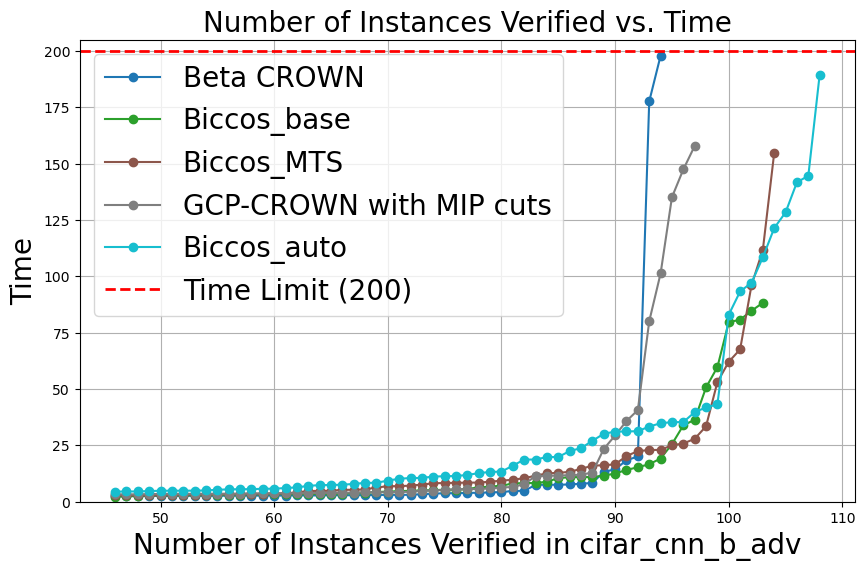

In [27]:
plot_multiple_dfs(
    [
log_read('cifar_cnn_b_adv/beta.log'),
log_read('cifar_cnn_b_adv/biccos_only_cs.log'),
log_read('cifar_cnn_b_adv/biccos_all.log'),
log_read('cifar_cnn_b_adv/gcp.log'),
log_read('cifar_cnn_b_adv/biccos_all_selective_mts_plus_gcp.log'),
    ],
    [
        'Beta CROWN',
        'Biccos_base',
        'Biccos_MTS',
        'GCP-CROWN with MIP cuts', 
        'Biccos_auto'
     ],  time_limit=200, dataset='cifar_cnn_b_adv'

)

In [28]:
main('cifar_cnn_b_adv/beta.log'),



    Status      Time  Domain Visited  Cut Generation  Unsat Nodes  \
6     safe    4.7873             187               0            0   
7     safe    2.6164               1               0            0   
11    safe    2.6395               6               0            0   
14    safe    2.4546               0               0            0   
18    safe    7.9988            2762               0            0   
37    safe   20.0710           15001               0            0   
39    safe    3.5820              65               0            0   
42    safe    3.7816             201               0            0   
49    safe    2.5180               0               0            0   
51    safe    2.4843               0               0            0   
54    safe    3.0299               8               0            0   
55    safe    2.9351               3               0            0   
56    safe  197.8851          450797               0            0   
59    safe    3.3464              

((95.0, 6.3974210526315805, 18106.469387755104, 0.0),)

In [29]:
main('cifar_cnn_b_adv/biccos_only_cs.log'),


    Status     Time  Domain Visited  Cut Generation  Unsat Nodes  \
6     safe   8.2909             315             191         1017   
7     safe   3.4482             100              16          432   
11    safe   3.5143             100              35          419   
14    safe   2.9458               0               1           32   
18    safe  12.5098            1612             127         1678   
19    safe  88.2729           92648             283        59971   
37    safe  19.1531            5308             499         3461   
39    safe   3.8686              59              34          164   
42    safe   4.3194             201              48          230   
49    safe   3.1475              50              12          432   
51    safe   3.4121              50               5          350   
54    safe   5.1204             104              29          423   
55    safe   6.3916             223              47          860   
56    safe  15.2918            6941             

((104.0, 8.14783173076923, 9803.965517241379, 163.06896551724137),)

In [30]:
main('cifar_cnn_b_adv/biccos_all.log'),


    Status      Time  Domain Visited  Cut Generation  Unsat Nodes  \
6     safe    8.3142             306             163          964   
7     safe    3.5122             100              16          400   
11    safe    3.6628             100              35          419   
14    safe    2.8570               0               1           24   
18    safe   12.5685            1399             131         1537   
19    safe   96.0354           86273             778        28763   
37    safe   22.9579            5064             677         4556   
39    safe    8.4905             231             117          861   
42    safe    9.7726             311              34          806   
48    safe   62.0838           58436             339        29743   
49    safe    3.1549              50              12          400   
51    safe    3.1564              50               5          318   
54    safe    5.2759             102              33          412   
55    safe    6.3303             2

((105.0, 10.13838761904762, 9012.677966101695, 198.54237288135593),)

In [31]:
main('cifar_cnn_b_adv/gcp.log'),


    Status      Time  Domain Visited  Cut Generation  Unsat Nodes  \
6     safe    6.5585             187               0            0   
7     safe    3.2760               1               0            0   
11    safe    3.4646               6               0            0   
14    safe    3.2520               0               0            0   
18    safe   11.4742            2763               0            0   
37    safe   35.8213           15041               0            0   
39    safe    5.2983              65               0            0   
42    safe    5.6278             201               0            0   
49    safe    3.6831               0               0            0   
51    safe    3.5434               0               0            0   
54    safe    4.4351               8               0            0   
55    safe    3.9243               3               0            0   
56    safe   80.0719          127057               0            0   
59    safe    4.9208              

((98.0, 10.07349081632653, 17309.634615384617, 0.0),)

In [32]:
main('cifar_cnn_b_adv/biccos_all_selective_mts_plus_gcp.log'),

    Status      Time  Domain Visited  Cut Generation  Unsat Nodes  \
6     safe   11.4180             256             121          964   
7     safe    5.5577             100              16          400   
11    safe    5.4818             100              35          419   
14    safe    4.5390               0               1           24   
18    safe   19.8327            1476             127         1635   
19    safe   34.8175           10770             273         9745   
37    safe   35.3340            5069             771         4281   
39    safe   11.2962             231             110          861   
42    safe   13.2190             261              33          806   
48    safe   93.2955           76736             459        42487   
49    safe    4.9979              50              12          400   
51    safe    4.9083              50               5          318   
52    safe  144.6037          103052            1736        30705   
54    safe    7.9057             1

((109.0, 17.757308256880734, 12782.825396825398, 332.1746031746032),)

## cifar_cnn_b_adv4

/tmp/ipykernel_1193169/406527908.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(dfs))


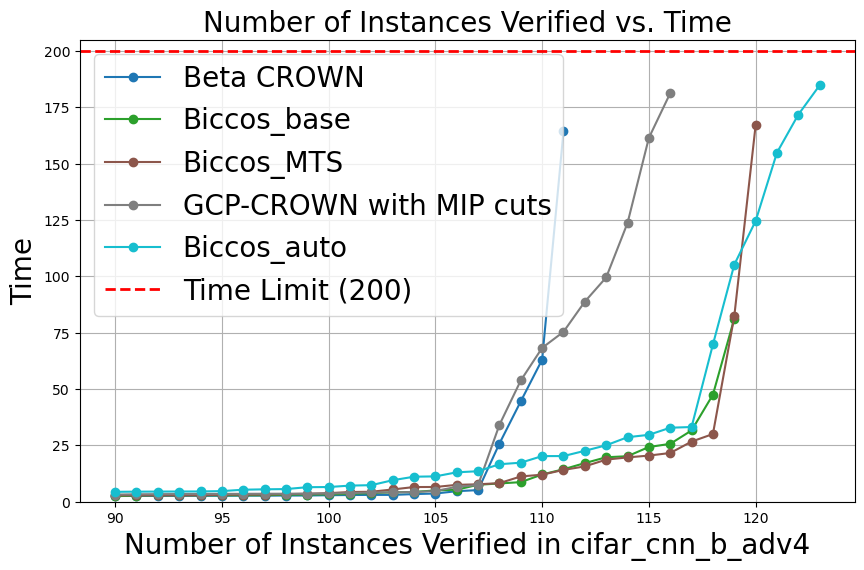

In [33]:
plot_multiple_dfs(
    [
log_read('cifar_cnn_b_adv4/beta.log'),
log_read('cifar_cnn_b_adv4/biccos_only_cs.log'),
log_read('cifar_cnn_b_adv4/biccos_all.log'),
log_read('cifar_cnn_b_adv4/gcp.log'),
log_read('cifar_cnn_b_adv4/biccos_all_selective_mts_plus_gcp.log'),
    ],
    [
        'Beta CROWN',
        'Biccos_base',
        'Biccos_MTS',
        'GCP-CROWN with MIP cuts',
        'Biccos_auto'
    ],  time_limit=200, dataset='cifar_cnn_b_adv4'
)

In [34]:
main('cifar_cnn_b_adv4/beta.log'),



    Status      Time  Domain Visited  Cut Generation  Unsat Nodes  \
13    safe    3.3845              16               0            0   
18    safe    2.5627               0               0            0   
37    safe    2.7361               0               0            0   
48    safe    2.6026               0               0            0   
54    safe    5.1525             228               0            0   
56    safe   25.8104           39807               0            0   
64    safe    2.5425               0               0            0   
75    safe    2.8799               2               0            0   
83    safe  164.3059          251459               0            0   
91    safe   44.5424           71885               0            0   
95    safe    4.6769              68               0            0   
97    safe   63.0245           98227               0            0   
98    safe    2.6364               0               0            0   
122   safe    3.6379              

((112.0, 3.2024258928571436, 20987.409090909092, 0.0),)

In [35]:
main('cifar_cnn_b_adv4/biccos_only_cs.log'),


    Status     Time  Domain Visited  Cut Generation  Unsat Nodes  \
11    safe  81.2465           79407             341        25016   
13    safe   4.1864             106              13          420   
18    safe   2.8749               0               1           42   
19    safe  17.1404           12180             107         8620   
37    safe   4.3340              50              10          475   
48    safe   2.8312               0               1           16   
54    safe   7.5151             331             103          415   
56    safe  12.0806            2644              68         2073   
64    safe   2.8522               0               1           65   
72    safe  31.6259           21718             408        15756   
75    safe   3.4748             100               8          338   
76    safe  20.1944           17015              60        13452   
83    safe  25.6816           15488             501         8698   
91    safe  19.7282           10510             

((120.0, 3.18777, 7545.833333333333, 91.2),)

In [36]:
main('cifar_cnn_b_adv4/biccos_all.log'),


    Status      Time  Domain Visited  Cut Generation  Unsat Nodes  \
11    safe   82.2805           75435             386        28588   
13    safe    4.3073             108              14          406   
18    safe    2.8323               0               1           26   
21    safe  167.0538          172949             394        45323   
37    safe    4.4213              50              10          443   
48    safe    3.1164               0               1            9   
54    safe    7.4879             334             103          405   
56    safe   11.9975            2197              50         1352   
64    safe    2.8164               0               1           49   
75    safe    3.5269             100               8          323   
76    safe   19.6670           13495              58        12723   
83    safe   20.4715           10014             353         4781   
91    safe   21.6233           10579             176         5441   
93    safe    7.7334             6

((121.0, 4.38556694214876, 11585.870967741936, 90.90322580645162),)

In [37]:
main('cifar_cnn_b_adv4/gcp.log'),


    Status      Time  Domain Visited  Cut Generation  Unsat Nodes  \
6     safe  123.6749          135502               0            0   
11    safe  181.2804          195446               0            0   
13    safe    4.3163              16               0            0   
18    safe    3.1722               0               0            0   
37    safe    3.6484               0               0            0   
48    safe    3.3558               0               0            0   
54    safe    7.4158             228               0            0   
56    safe   34.1062           39821               0            0   
64    safe    3.3076               0               0            0   
75    safe    3.5937               2               0            0   
76    safe  161.4464          187278               0            0   
83    safe   75.3841          102646               0            0   
91    safe   53.8001           71886               0            0   
93    safe   88.7771           961

((117.0, 8.27372564102564, 37661.92592592593, 0.0),)

In [38]:
main('cifar_cnn_b_adv4/biccos_all_selective_mts_plus_gcp.log'),

    Status      Time  Domain Visited  Cut Generation  Unsat Nodes  \
6     safe  171.7695          117261            1968        70944   
11    safe  105.1750           75417            1267        29677   
13    safe    7.3490             108              14          406   
18    safe    4.4991               0               1           26   
19    safe   20.2583            1589             119         1869   
21    safe  124.5830          107554            1028        45530   
37    safe    6.5177              50              10          443   
48    safe    4.7096               0               1            9   
54    safe   13.0460             333             103          403   
56    safe   20.2437            1994              69         1244   
64    safe    4.3914               0               1           49   
75    safe    6.4447             100               8          323   
76    safe   29.6831           16953              29        13395   
83    safe   28.6263            51

((124.0, 9.639650806451614, 17886.029411764706, 351.8529411764706),)

## mnist_cnn_a_adv

/tmp/ipykernel_1193169/406527908.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(dfs))


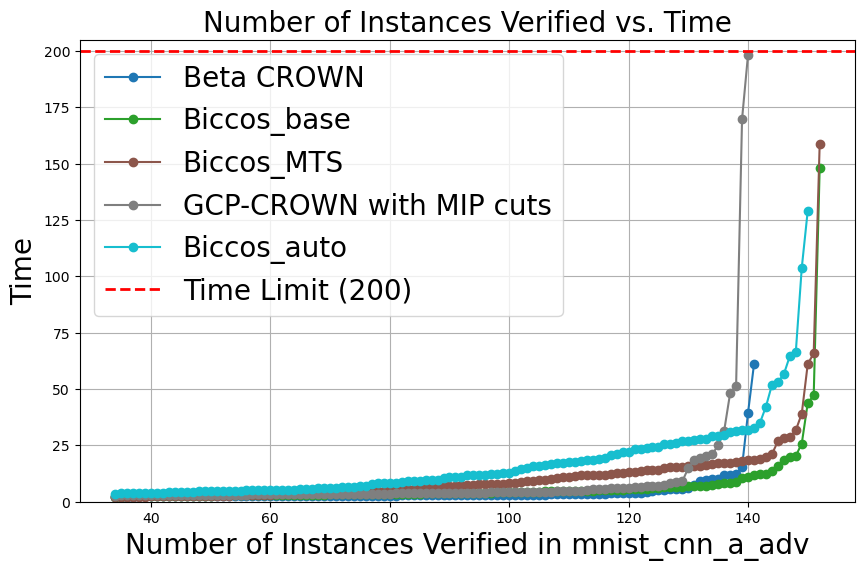

In [39]:
plot_multiple_dfs(
    [
log_read('mnist_cnn_a_adv/beta.log'),
log_read('mnist_cnn_a_adv/biccos_only_cs.log'),
log_read('mnist_cnn_a_adv/biccos_all.log'),
log_read('mnist_cnn_a_adv/gcp.log'),
log_read('mnist_cnn_a_adv/biccos_all_selective_mts_plus_gcp.log'),
    ],
    [
        'Beta CROWN',
        'Biccos_base',
        'Biccos_MTS',
        'GCP-CROWN with MIP cuts',
        'Biccos_auto'
    ],  time_limit=200, dataset='mnist_cnn_a_adv'
)

In [40]:
main('mnist_cnn_a_adv/beta.log'),



    Status     Time  Domain Visited  Cut Generation  Unsat Nodes  \
1     safe   5.4361               0               0            0   
2     safe   5.7833             311               0            0   
3     safe   2.2272               0               0            0   
4     safe   2.3615               0               0            0   
8     safe  11.9162           12493               0            0   
9     safe   2.3778               0               0            0   
10    safe   5.7009            1861               0            0   
11    safe   3.8415             102               0            0   
15    safe   3.3068              22               0            0   
17    safe   9.0937            4839               0            0   
18    safe  10.2400           10631               0            0   
19    safe   3.1644               0               0            0   
20    safe   2.4812               0               0            0   
21    safe   2.4401               0             

((142.0, 3.535354929577465, 3145.1481481481483, 0.0),)

In [41]:
main('mnist_cnn_a_adv/biccos_only_cs.log'),


    Status      Time  Domain Visited  Cut Generation  Unsat Nodes  \
1     safe    5.9383               0               0          256   
2     safe   12.2652             305             229         2749   
3     safe    2.7392               0               1          256   
4     safe    3.6134               0               1          512   
8     safe    8.0139            1200             183         2358   
9     safe    2.5331               0               0          256   
10    safe    8.2749             870             108         1394   
11    safe    6.3955             100             144         1489   
15    safe    4.7734              22              73          992   
16    safe   47.1905           51661             776        28877   
17    safe    6.2552            1012             196         1538   
18    safe    6.5166            1433             138         2377   
19    safe    3.6235               0               0          256   
20    safe    4.6562             1

((153.0, 5.6104418300653585, 3330.672268907563, 113.36134453781513),)

In [42]:
main('mnist_cnn_a_adv/biccos_all.log'),


    Status      Time  Domain Visited  Cut Generation  Unsat Nodes  \
1     safe   13.0062             300              55         1871   
2     safe   21.1036            1173             398         5284   
3     safe    2.6430               0               1           20   
4     safe    3.5466               0               1           23   
8     safe   17.3110            1354             222         4483   
9     safe    4.1847               0               1          122   
10    safe   16.8662            1370             205         4504   
11    safe   15.5393             601             153         4253   
15    safe   13.3344             800              83         3625   
16    safe   65.8568           61542            1001        32084   
17    safe   10.9374            1364             100         2491   
18    safe   15.6031            1500             211         5626   
19    safe   12.0667             450              94         3031   
20    safe    4.0053             1

((153.0, 8.860390849673204, 3543.3949579831933, 132.98319327731093),)

In [43]:
main('mnist_cnn_a_adv/gcp.log'),


    Status      Time  Domain Visited  Cut Generation  Unsat Nodes  \
1     safe    6.1409               0               0            0   
2     safe    8.4156             292               0            0   
3     safe    2.6836               0               0            0   
4     safe    2.9343               0               0            0   
8     safe   18.5455           12471               0            0   
9     safe    3.0989               0               0            0   
10    safe    8.9712            1862               0            0   
11    safe    6.9818              94               0            0   
15    safe    4.3917              28               0            0   
17    safe   21.0113            4816               0            0   
18    safe   31.4125           12448               0            0   
19    safe    4.1697               0               0            0   
20    safe    3.1954               0               0            0   
21    safe    2.9753              

((141.0, 7.345768085106384, 5469.289719626168, 0.0),)

In [44]:
main('mnist_cnn_a_adv/biccos_all_selective_mts_plus_gcp.log'),

    Status      Time  Domain Visited  Cut Generation  Unsat Nodes  \
1     safe   17.2712             200              54         1871   
2     safe   42.2000            1102            3011         5376   
3     safe    3.6464               0               1           20   
4     safe    4.7020               0               1           35   
8     safe   31.8653            1361            1798         4652   
9     safe    5.6660               0               1          164   
10    safe   31.1556            1337            1359         4450   
11    safe   28.0074             556            1246         4212   
15    safe   26.1206             750            1193         3680   
16    safe  129.0884           97314            7736        54672   
17    safe   17.2182            1315             100         2435   
18    safe   29.0199            1577            1312         4914   
19    safe   19.5634             400             641         3031   
20    safe    6.7024             1

((151.0, 13.377114569536424, 2857.8888888888887, 622.5042735042736),)

# Oval22

/tmp/ipykernel_1193169/406527908.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(dfs))


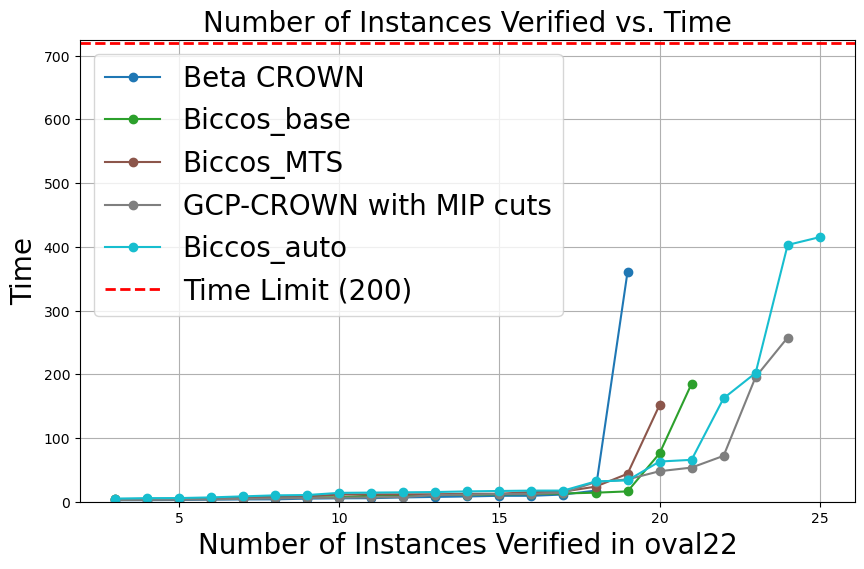

In [45]:
plot_multiple_dfs(
    [
log_read('oval22/beta.log'),
log_read('oval22/biccos_only_cs.log'),
log_read('oval22/biccos_all.log'),
log_read('oval22/gcp.log'),
log_read('oval22/biccos_all_selective_mts_plus_gcp.log'),
    ],
    [
        'Beta CROWN',
        'Biccos_base',
        'Biccos_MTS',
        'GCP-CROWN with MIP cuts',
        'Biccos_auto'
    ],
     time_limit=720, dataset='oval22'
)

In [46]:
main('oval22/beta.log'),



   Status      Time  Domain Visited  Cut Generation  Unsat Nodes  \
0    safe    9.2995             134               0            0   
1    safe    6.7363             310               0            0   
2    safe    2.6957               2               0            0   
4    safe    2.4432               0               0            0   
5    safe    3.2916              14               0            0   
6    safe    5.5623             405               0            0   
7    safe    2.3401               0               0            0   
8    safe    8.2712            1932               0            0   
9    safe   17.4208            9391               0            0   
12   safe   11.3070            4140               0            0   
17   safe    3.5968              20               0            0   
21   safe    5.3676              47               0            0   
22   safe  360.6074          600262               0            0   
23   safe    4.8765               2             

((20.0, 23.262819999999998, 36299.41176470588, 0.0),)

In [47]:
main('oval22/biccos_only_cs.log'),


   Status      Time  Domain Visited  Cut Generation  Unsat Nodes  \
0    safe   16.1922             268              75         1214   
1    safe   10.4966             415             159         2155   
2    safe    4.2127             150              46          656   
4    safe    3.6151             100              11          575   
5    safe    6.7505             198              41         1266   
6    safe    5.9388             208             110         1230   
7    safe    4.2870             136              68          616   
8    safe    6.9577             531             158         1724   
9    safe    9.9973            1921             130         2415   
12   safe   11.5225            1415             258         1928   
17   safe    6.6732             167             189          897   
19   safe   14.1739            9208             316         8676   
21   safe   11.9962             211             104         1262   
22   safe   75.7813           54684             

((22.0, 18.755681818181817, 10589.315789473685, 147.94736842105263),)

In [48]:
main('oval22/biccos_all.log'),

   Status      Time  Domain Visited  Cut Generation  Unsat Nodes  \
0    safe   15.9124             257              43         1260   
1    safe    8.5892             342              76         1612   
2    safe    3.9201             150              48          400   
4    safe    3.5082             100              11          319   
5    safe    6.7007             189              64         1023   
6    safe   11.4739             387              60         1763   
7    safe    4.1074             136              29          360   
8    safe   12.4658             833              99         1611   
9    safe   15.2152            1455             245         3012   
12   safe   11.5364            1237             225         1961   
17   safe    7.7919             171             227         1209   
21   safe   11.1752             213             138         1301   
22   safe   43.8259           28233             602        11481   
23   safe   11.7245             222             

((21.0, 17.23317619047619, 7377.777777777777, 134.83333333333334),)

In [49]:
main('oval22/gcp.log'),


   Status      Time  Domain Visited  Cut Generation  Unsat Nodes  \
0    safe   35.0019             134               0            0   
1    safe    7.3679             310               0            0   
2    safe    3.0164               2               0            0   
4    safe    3.3144               0               0            0   
5    safe    3.6891              14               0            0   
6    safe    6.8192             405               0            0   
7    safe    2.9198               0               0            0   
8    safe   11.1099            1931               0            0   
9    safe   12.2731            3133               0            0   
12   safe   14.0202            4140               0            0   
13   safe  257.6644           72727               0            0   
16   safe  195.7084           97489               0            0   
17   safe    4.4513              20               0            0   
19   safe   47.8797           48317             

((25.0, 32.126236, 13182.318181818182, 0.0),)

In [50]:
main('oval22/biccos_all_selective_mts_plus_gcp.log'),

   Status      Time  Domain Visited  Cut Generation  Unsat Nodes  \
0    safe   16.8705             230             286          968   
1    safe   10.5120             342              78         1612   
2    safe    5.6331             150              48          400   
3    safe  402.9608          123496           50980        74856   
4    safe    4.9044             100              11          319   
5    safe    8.4169             199             101          881   
6    safe   13.9030             387              57         1763   
7    safe    5.7354             136              69          360   
8    safe   16.2240             734             616         1212   
9    safe   17.5002             816             603         2496   
12   safe   14.7150            1235             208         1951   
13   safe  415.1779          180044           40888       114249   
16   safe  162.3256           60446           13083        32774   
17   safe    9.9869             171             

((26.0, 59.8434923076923, 20937.956521739132, 5718.173913043478),)

In [51]:
main('oval21/beta.log'),



   Status      Time  Domain Visited  Cut Generation  Unsat Nodes  \
0    safe    6.3020               0               0            0   
1    safe    3.3086               2               0            0   
2    safe   12.0253            4895               0            0   
4    safe    3.8141              45               0            0   
6    safe    2.8971               4               0            0   
10   safe    7.3286             592               0            0   
13   safe   27.1041           26888               0            0   
18   safe    2.5405               0               0            0   
19   safe  376.3257          761646               0            0   
21   safe    5.3287              10               0            0   
23   safe    6.5046              55               0            0   
26   safe  299.9599          486308               0            0   
28   safe    3.9717               0               0            0   

    BaB Round Count  BaB_lb_rhs  
0            

((14.0, 54.111871428571426, 98495.76923076923, 0.0),)

In [52]:
main('oval21/biccos_only_cs.log'),


   Status      Time  Domain Visited  Cut Generation  Unsat Nodes  \
0    safe    7.7053               0               1          256   
1    safe    3.5405               2              30          512   
2    safe   15.8831            2480             622         2169   
4    safe    4.4837              45              73         1122   
6    safe    6.5831             107              41         1358   
9    safe   63.0616           43384             548        27488   
10   safe   10.1080             498             235         2302   
13   safe   24.9238           15102            1251        10438   
18   safe    4.4898             110              25          618   
21   safe   10.4515             167              44          906   
23   safe   12.0315             160             148         1022   
26   safe  603.4611          472201             588       196418   
28   safe    6.0427              58              67          656   

    BaB Round Count  BaB_lb_rhs  
0            

((14.0, 55.21342142857143, 41101.07692307692, 282.53846153846155),)

# cifar100

/tmp/ipykernel_1193169/1472281028.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(dfs))


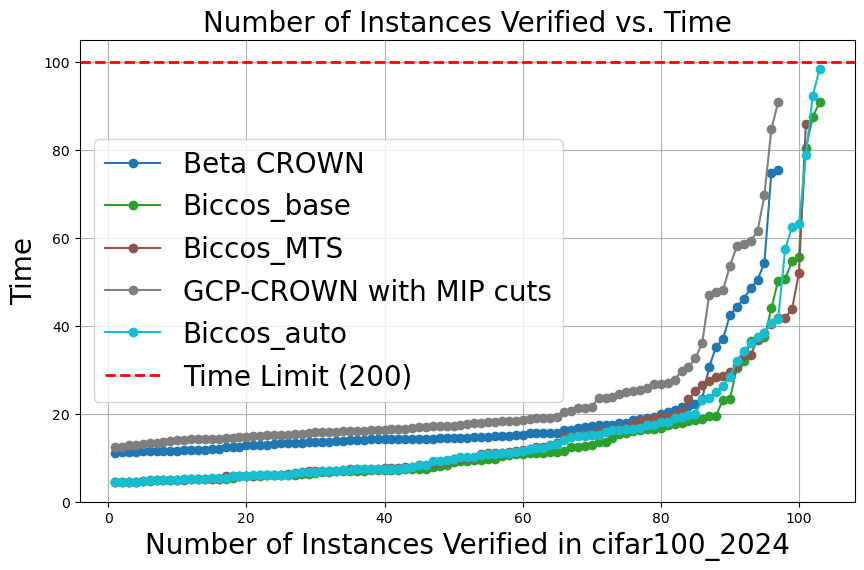

In [53]:
def plot_multiple_dfs(dfs, labels, venus=False, dataset=None, Cut=False, time_limit=200):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Define a color map for different dataframes
    colors = plt.cm.get_cmap('tab10', len(dfs))
    
    # Check if any dataframe has 'Cut Generation' with non-zero values
    if Cut:
        has_cut_generation = any('Cut Generation' in df.columns and df['Cut Generation'].sum() > 0 for df in dfs)
    else:
        has_cut_generation = False
    ax2 = None
    for i, (df, label) in enumerate(zip(dfs, labels)):
        # Filter out rows where Status is 'safe'
        if venus:
            df_filtered = df.loc[(df['Status'] == 'safe-incomplete') | (df['Status'] == 'safe') | (df['Status'] == 'safe-mip') | (df['Status'] == 'safe-mip (timed out)')]
        else:
            df_filtered = df.loc[(df['Status'] == 'safe') | (df['Status'] == 'safe-mip') | (df['Status'] == 'safe-mip (timed out)')]
        
        # Sort the dataframe by Time
        df_filtered = df_filtered.sort_values(by='Time')
        
        # Compute the cumulative count of verified instances
        df_filtered['Cumulative Count'] = range(1, len(df_filtered) + 1)
        
        # Plot Cumulative Count vs. Time
        ax1.plot(df_filtered['Cumulative Count'], df_filtered['Time'], marker='o', linestyle='-', color=colors(i), label=label)
        
        # If 'Cut Generation' exists and has non-zero values, plot it as well
        if Cut:
            if has_cut_generation and 'Cut Generation' in df.columns and df['Cut Generation'].sum() > 0:
                if ax2 is None:
                    ax2 = ax1.twinx()  # Create a second y-axis if needed
                ax2.bar(df_filtered['Cumulative Count'], df_filtered['Cut Generation'], color=colors(i), alpha=0.3, label=f'{label} Cut Generation')
                ax2.set_ylabel('Cut Generation', fontsize=20)

    ax1.set_xlabel(f'Number of Instances Verified in {dataset}', fontsize=20)
    ax1.set_ylabel('Time', fontsize=20)
    ax1.set_title('Number of Instances Verified vs. Time', fontsize=20)
    ax1.grid(True)

    # Set the y-axis limit
    max_time = max(df_filtered['Time'].max(), time_limit)
    ax1.set_ylim(0, max_time + 5)
    
    # Add a horizontal line at y=200 to emphasize the time limitation
    if max_time + 5 > time_limit:
        ax1.axhline(y=time_limit, color='red', linestyle='--', linewidth=2, label='Time Limit (200)')
    
    # Combine legends from both y-axes if 'Cut Generation' was plotted
    lines, labels = ax1.get_legend_handles_labels()
    if has_cut_generation:
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines + lines2, labels + labels2, fontsize=20)
    else:
        ax1.legend(lines, labels, fontsize=20)
    
    plt.show()

plot_multiple_dfs(
    [
log_read('cifar100/beta.log'),
log_read('cifar100/biccos_only_cs.log'),
log_read('cifar100/biccos_all.log'),
log_read('cifar100/gcp.log'),
log_read('cifar100/biccos_all_selective_mts.log'),
    ],
    [
        'Beta CROWN',
        'Biccos_base',
        'Biccos_MTS',
        'GCP-CROWN with MIP cuts',
        'Biccos_auto'
    ],
     time_limit=100, dataset='cifar100_2024'
)

/tmp/ipykernel_1193169/2956103369.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(dfs))


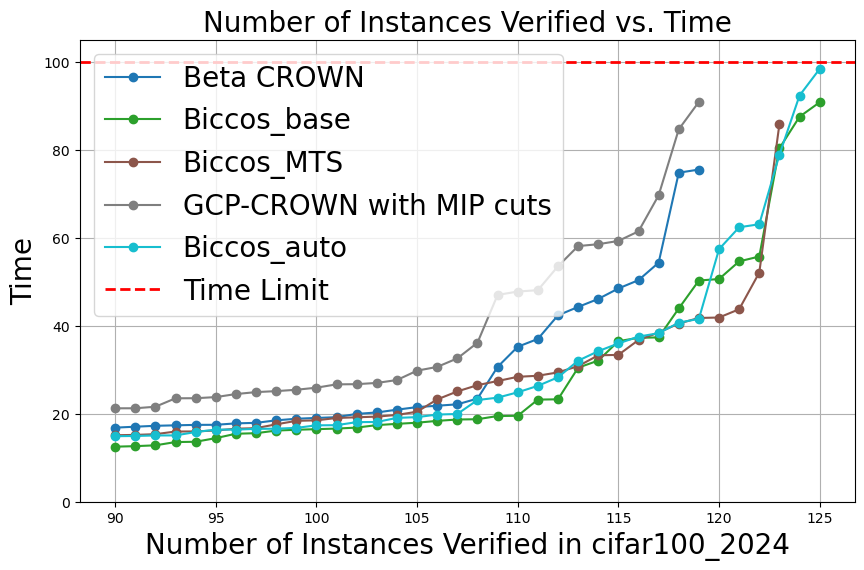

In [54]:
import matplotlib.pyplot as plt

def plot_multiple_dfs(dfs, labels, venus=True, dataset=None, Cut=False, time_limit=200, min_count=90):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Define a color map for different dataframes
    colors = plt.cm.get_cmap('tab10', len(dfs))
    
    # Check if any dataframe has 'Cut Generation' with non-zero values
    if Cut:
        has_cut_generation = any('Cut Generation' in df.columns and df['Cut Generation'].sum() > 0 for df in dfs)
    else:
        has_cut_generation = False
    ax2 = None
    for i, (df, label) in enumerate(zip(dfs, labels)):
        # Filter out rows where Status is 'safe'
        if venus:
            df_filtered = df.loc[(df['Status'] == 'safe-incomplete') | (df['Status'] == 'safe') | (df['Status'] == 'safe-mip') | (df['Status'] == 'safe-mip (timed out)')]
        else:
            df_filtered = df.loc[(df['Status'] == 'safe') | (df['Status'] == 'safe-mip') | (df['Status'] == 'safe-mip (timed out)')]
        
        # Sort the dataframe by Time
        df_filtered = df_filtered.sort_values(by='Time')
        
        # Compute the cumulative count of verified instances
        df_filtered['Cumulative Count'] = range(1, len(df_filtered) + 1)
        
        # Filter based on min_count
        df_filtered = df_filtered[df_filtered['Cumulative Count'] >= min_count]
        
        # Plot Cumulative Count vs. Time
        ax1.plot(df_filtered['Cumulative Count'], df_filtered['Time'], marker='o', linestyle='-', color=colors(i), label=label)
        
        # If 'Cut Generation' exists and has non-zero values, plot it as well
        if Cut:
            if has_cut_generation and 'Cut Generation' in df.columns and df['Cut Generation'].sum() > 0:
                if ax2 is None:
                    ax2 = ax1.twinx()  # Create a second y-axis if needed
                ax2.bar(df_filtered['Cumulative Count'], df_filtered['Cut Generation'], color=colors(i), alpha=0.3, label=f'{label} Cut Generation')
                ax2.set_ylabel('Cut Generation', fontsize=20)

    ax1.set_xlabel(f'Number of Instances Verified in {dataset}', fontsize=20)
    ax1.set_ylabel('Time', fontsize=20)
    ax1.set_title('Number of Instances Verified vs. Time', fontsize=20)
    ax1.grid(True)

    # Set the y-axis limit
    max_time = max(df_filtered['Time'].max(), time_limit)
    ax1.set_ylim(0, max_time + 5)
    
    # Add a horizontal line at y=200 to emphasize the time limitation
    if max_time + 5 > time_limit:
        ax1.axhline(y=time_limit, color='red', linestyle='--', linewidth=2, label='Time Limit')
    
    # Combine legends from both y-axes if 'Cut Generation' was plotted
    lines, labels = ax1.get_legend_handles_labels()
    if has_cut_generation:
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines + lines2, labels + labels2, fontsize=20)
    else:
        ax1.legend(lines, labels, fontsize=20)
    
    plt.show()


plot_multiple_dfs(
    [
log_read('cifar100/beta.log'),
log_read('cifar100/biccos_only_cs.log'),
log_read('cifar100/biccos_all.log'),
log_read('cifar100/gcp.log'),
log_read('cifar100/biccos_all_selective_mts.log'),
    ],
    [
        'Beta CROWN',
        'Biccos_base',
        'Biccos_MTS',
        'GCP-CROWN with MIP cuts',
        'Biccos_auto'
    ],
     time_limit=100, dataset='cifar100_2024'
)

In [55]:
main('cifar100/beta.log'),
main('cifar100/biccos_only_cs.log'),
main('cifar100/biccos_all.log'),
main('cifar100/gcp.log'),
main('cifar100/biccos_all_selective_mts_plus_gcp.log'),


    Status     Time  Domain Visited  Cut Generation  Unsat Nodes  \
0     safe  35.2178            2548               0            0   
1     safe  11.3097               0               0            0   
3     safe  16.2724             218               0            0   
4     safe  19.9624             736               0            0   
6     safe  11.1832               0               0            0   
8     safe  20.9203            1474               0            0   
17    safe  18.8598             511               0            0   
18    safe  12.3676              14               0            0   
19    safe  11.6350               1               0            0   
22    safe  11.4630               1               0            0   
23    safe  17.4644             307               0            0   
26    safe  11.3360               0               0            0   
27    safe  46.0858           19888               0            0   
29    safe  11.3107               0             

((121.0, 24.819953719008264, 729.8888888888889, 142.989898989899),)

# tinyimagenet 2024

/tmp/ipykernel_1193169/2956103369.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(dfs))


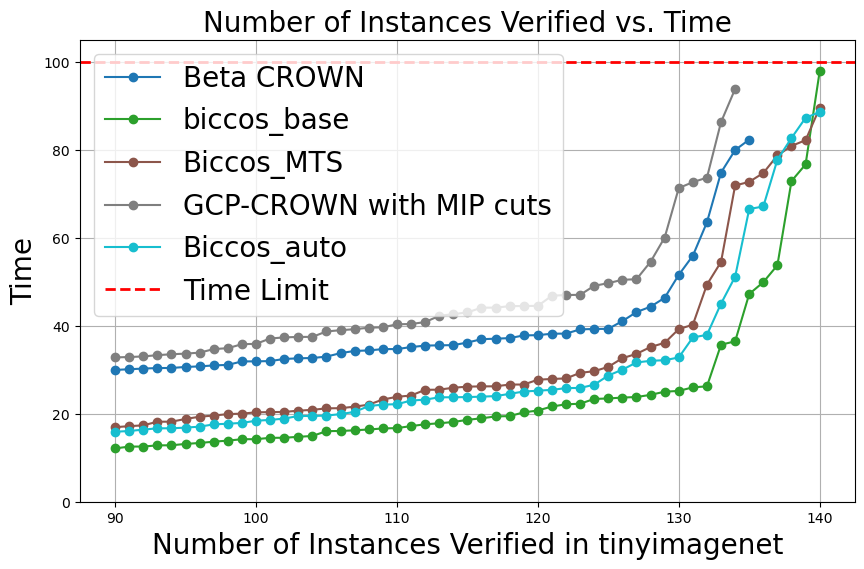

In [56]:
plot_multiple_dfs(
    [
log_read('tinyimagenet/beta.log'),
log_read('tinyimagenet/biccos_only_cs.log'),
log_read('tinyimagenet/biccos_all.log'),
log_read('tinyimagenet/gcp.log'),
log_read('tinyimagenet/biccos_all_selective_mts.log'),
     ],
    [
        'Beta CROWN',
        'biccos_base',
        'Biccos_MTS',
        'GCP-CROWN with MIP cuts',
        'Biccos_auto'
    ],  time_limit=100, dataset='tinyimagenet'
)

In [57]:
main('tinyimagenet/beta.log'),


    Status     Time  Domain Visited  Cut Generation  Unsat Nodes  \
0     safe  27.6563               0               0            0   
1     safe  22.1909               1               0            0   
4     safe  23.4299              22               0            0   
7     safe  29.4149             311               0            0   
9     safe  25.5656               1               0            0   
10    safe  26.3134               0               0            0   
12    safe  27.3122               9               0            0   
13    safe  25.2682               0               0            0   
14    safe  27.6233              14               0            0   
17    safe  27.5000               1               0            0   
18    safe  26.7579               1               0            0   
20    safe  38.2063            1602               0            0   
21    safe  25.8530               0               0            0   
22    safe  39.2582            3033             

((135.0, 28.878298518518516, 906.6967213114754, 0.0),)

In [58]:
main('tinyimagenet/biccos_only_cs.log'),


    Status     Time  Domain Visited  Cut Generation  Unsat Nodes  \
0     safe  17.8246              50              19          496   
1     safe  12.5417             100              32          788   
4     safe  10.2682             116              11          378   
7     safe  16.7402             309             590          537   
8     safe  49.8977           10203             826         4003   
9     safe   6.9767              50               9          227   
10    safe   6.8701              50              13          416   
12    safe   8.8871             102              44          416   
13    safe   7.5588              50               8          192   
14    safe   8.7868             103              51          431   
17    safe   9.7881              50              22          569   
18    safe   7.8328             100              20          416   
20    safe  25.9963            1270             214         1224   
21    safe   7.0167              50             

((140.0, 13.84689857142857, 902.9763779527559, 134.99212598425197),)

In [59]:
main('tinyimagenet/biccos_all.log'),


    Status     Time  Domain Visited  Cut Generation  Unsat Nodes  \
0     safe  16.6384              50              19          480   
1     safe  12.1753             100              32          756   
4     safe  10.0096             127              13          387   
7     safe  17.1772             309             592          523   
8     safe  72.6940            9978             939         6695   
9     safe   7.6286              50               9          211   
10    safe   7.5845              50              13          400   
12    safe   9.1690             102              42          416   
13    safe   7.0345              50               8          176   
14    safe   9.6956             104              51          416   
17    safe  10.7693              50              22          553   
18    safe   8.1820             100              20          400   
20    safe  25.4694            1301             305         1208   
21    safe   6.6806              50             

((140.0, 17.80557642857143, 896.5196850393701, 169.41732283464566),)

In [60]:
main('tinyimagenet/biccos_all_selective_mts.log'),

    Status     Time  Domain Visited  Cut Generation  Unsat Nodes  \
0     safe  16.6809              50              19          480   
1     safe  11.8851             100              32          756   
4     safe   9.7886             127              17          387   
7     safe  16.0727             312             576          533   
8     safe  66.5242            9732            1051         6405   
9     safe   6.5386              50               9          211   
10    safe   6.5932              50              13          400   
12    safe   8.5887             102              43          416   
13    safe   6.7118              50               8          176   
14    safe   8.5040             104              51          416   
17    safe   9.5774              50              22          553   
18    safe   7.6297             100              20          400   
20    safe  24.0030            1187             213         1195   
21    safe   6.5645              50             

((140.0, 16.32836142857143, 874.0551181102362, 181.53543307086613),)